<font color = Magenta> _Lixandru Andreea Bianca 382
 <br>   Pepene Adina Florentina 382_

# Laborator 2

Saptamana 9-13 martie 2020

Continut:
1. Biblioteca ipywidgets
1. Exercitii cu ipywidgets

## Folosire de controale grafice

Notebook-urile - indiferent ca se ruleaza in Jupyter lab sau Jupyter notebook - se pot folosi pentru demo-uri interactive. O varianta este modificarea codului in timpul demo-ului si rularea manuala a celulelor afectate - nu intotdeauna rapid de facut. O alta varianta este folosirea de controale grafice care sa permita utilizatorului sa modifice optiuni, valori de parametri etc. 

[ipywidgets](https://ipywidgets.readthedocs.io/en/stable/) este o biblioteca de controale grafice care permit interactiune cu utilizatorul. Mai jos sunt cateva demo-uri de urmarit. 

* Demo 1: [![Alt text](https://img.youtube.com/vi/nRmkS_6ngCU/0.jpg)](https://www.youtube.com/watch?v=nRmkS_6ngCU)

* Demo 2: [![Alt text](https://img.youtube.com/vi/j5d7vOQBttI/0.jpg)](https://www.youtube.com/watch?v=j5d7vOQBttI)

* Demo 3: [![Alt text](https://img.youtube.com/vi/wxVx54ax47s/0.jpg)](https://www.youtube.com/watch?v=wxVx54ax47s)

* Demo 4: [![Alt text](https://img.youtube.com/vi/i40d8-Hu4vM/0.jpg)](https://www.youtube.com/watch?v=i40d8-Hu4vM)

### Exemple de utilizare

Documentatia completa si exemple sunt date [aici](https://ipywidgets.readthedocs.io/en/stable/user_guide.html).

Incarcarea pachetului de `ipywidgets` se face prin:

In [1]:
import ipywidgets as widgets

De regula, e nevoie si de alte pachete, de exemplu:

In [2]:
from ipywidgets import interact, interactive, fixed, interact_manual

Cel mai simplu control utilizabil este `interact`. El poate prelua ca prim parametru numele unei functii, iar al doilea parametru dicteaza forma controlului: slider, combo box, checkbox etc:

In [3]:
def n_factorial(n:int) -> int:
    """Calculeaza n factorial
    :param n: intreg >= 0 pt care se calculeaza factorialul
    :return: valoarea lui n!
    """
    p = 1
    for i in range(1, n+1):
        p *= i
    return str(n) + "!= " + str(p)

In [4]:
interact(n_factorial, n=100)

interactive(children=(IntSlider(value=100, description='n', max=300, min=-100), Output()), _dom_classes=('widg…

<function __main__.n_factorial(n: int) -> int>

Pentru limitarea domeniului in care $n$ poate sa ia valori se va folosi:

In [5]:
interact(n_factorial, n=(0, 100));

interactive(children=(IntSlider(value=50, description='n'), Output()), _dom_classes=('widget-interact',))

Pentru a evita actualizarea sacadata a valorilor afisate, se prefera inhibarea feedback-ului in timp real, precum in [Disabling continuous updates](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Disabling-continuous-updates). 

Pentru alte tipuri de controale folosind interact, se poate folosi:

In [6]:
def g(x, y, z, t):
    return (x, y, z, t)

interact(g, x=True, y=(1.0, 10.0, 0.5), z='Un text', 
         t={'English':'Hello', 'Romanian':'Salut', 'Spanish':'Hola'})

interactive(children=(Checkbox(value=True, description='x'), FloatSlider(value=5.5, description='y', max=10.0,…

<function __main__.g(x, y, z, t)>

Exemplu: Sa se deseneze graficul functiei $f:[left, right] \rightarrow \mathbb{R}$, $f(x) = a\cdot x^2 + b\cdot x + c$, cu $a, b, c$ coeficienti reali.

Rezolvare:

In [7]:
# import de pachete numerice si grafice

import matplotlib.pyplot as plt
import numpy as np

In [8]:
def f_square(a=10, b=20, c=-10,left=-10, right=20) -> None:
    '''Afiseaza graficul unei functii de gradul al doilea de forma:
    f(x)=a*x**2 + b*x + c. Valorile lui x sunt luate din intervalul 
    [left, right] prin discretizare.
    :param a: coeficientul lui x**2
    :param b: coeficientul lui x
    :param c: termenul liber
    :param left: capatul din stanga al intervalului peste care se face 
    reprezenatrea
    :param right: capatul din dreapta al intervalului peste care se face 
    reprezenatrea
    :return: None
    '''
    assert left < right
    range_x = np.linspace(left, right, 100)
    values_f = a * range_x ** 2 + b * range_x + c 
    plt.figure(figsize=(10, 8))
    plt.xlabel('x')
    plt.ylabel(str(a) + '$\cdot x^2 + $' + str(b) + '$\cdot x + $' + str(c))
    plt.plot(range_x, values_f, color='red')
    plt.grid(axis='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.show()
    
interact(f_square, a=(-100, 100.0), b=(-100, 100.0), c=(-100, 100.0), d=(-100, 100.0), e=(-100, 100.0));

interactive(children=(FloatSlider(value=10.0, description='a', min=-100.0), FloatSlider(value=20.0, descriptio…

In [9]:
def sinusoid(f=10):
    range_x = np.linspace(-5, 5, 100)
    values_f = np.sin(2 * np.pi * f * range_x)
    plt.xlabel('x')
    plt.ylabel(f'$2 \cdot \pi \cdot {f} \cdot x$')
    plt.grid(axis='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(range_x, values_f)
    
interact(sinusoid, f = (1, 100.0, 0.5));

interactive(children=(FloatSlider(value=10.0, description='f', min=1.0, step=0.5), Output()), _dom_classes=('w…

In [10]:
def f(x):
    """calcul functie intr-un punct"""
    return x ** 2 - 10 * x + 50

def f_values(left=-10, right=10):
    """calcul functie pe interval"""
    x = np.linspace(left, right, 100)
    return x, f(x)

def f_prime(x):
    """Calcul derivata f
    :param x: punctul in care se calculeaza derivata
    :return: f'(x)
    """
    return 2 * x - 10

def graph_f_and_derived(x, left=-30, right=30):
    # calcul valoare functie f
    x_range, fx = f_values(left, right)
    
    # intervalul pe care se reprezinta tangenta la grafic
    x_segment = np.linspace(x-10, x+10, 100)
    # panta tangentei la grafic este derivata functiei in pctul de tangenta
    slope = f_prime(x)
    
    #calcul puncte de tangenta
    y_segment = f(x) + slope * (x_segment - x)
    
    plt.figure(figsize=(20, 10))
    plt.plot(x_range, fx, color='red')
    plt.plot(x_segment, y_segment, color='blue')
    
# graf_f_and_derived(10, left=-30, right=30)

interact(graph_f_and_derived, x = (-20, 20))

interactive(children=(IntSlider(value=0, description='x', max=20, min=-20), IntSlider(value=-30, description='…

<function __main__.graph_f_and_derived(x, left=-30, right=30)>

## Exercitii `ipywidgets`:

1. (la clasa) Consideram functia $f(x) = x^2$ si punctul $P=(5, 3)$. Folosind controale grafice ipywidgets, sa se modifice functia $f$ prin translatarea ei pe orizontala si pe verticala, a.i. minimul functiei sa sa afle in punctul $P$; a se vedea mai jos exemplu de translatie pe verticala. Se cere desenarea axelor Ox si Oy cu reprezentarea puntului $P$ printr-un dreptunghi, desenarea functiei $f$ folosind o curba de 50 de puncte. Se vor determina coeficientii necesari mutarii functiei si se vor defini controale pentru acestea. ![vertical translation](./images/vertical_translation.png)
1. (3 puncte) Generati o lista de 20 de perechi de valori $\{x_i, y_i\}_{i=0,19}$ in intervalul [0, 10), afisati aceste valori pe un grafic, impreuna cu o dreapta definita de o functie liniara $y=a*x+b$. Intr-un alt plot afisati, ca histograma, distanta dintre un punct de coordonate $(x_i, y_i)$ si punctul de intersectie a verticalei duse prin $x_i$ cu dreapta data. Dreapta trebuie sa fie controlabila din widgets, prin cei doi coeficienti. Constatati modificarea histogramei in functie de pozitia dreptei si calculati suma: $\sum_{i=0}^{19} (y_i - (a\cdot x_i + b))^2$, adica suma patratelor lungimilor segmentelor verzi de mai jos.
![linear regression](./images/linreg.png)
*Indicatii:*
    1. Pentru generare de valori distribuite uniform in intervalul [0, 1) puteti folosi functia [numy.random.uniform](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.uniform.html) iar vectorul obtinut sa il inmultiti cu 10; in felul acesta, numerele generate vor fi uniform distribuite in intervalul $[0, 10)$.
    1. Puteti opta sa returnati cele 20 de puncte sub forma `vector_x`, `vector_y`.
1. (5 puncte) Incarcati fisierul `data/carbon_nanotubes.csv` (adaptare dupa [Carbon Nanotubes Data Set](http://archive.ics.uci.edu/ml/datasets/Carbon+Nanotubes)). In functie de alegerile exprimate de un utilizator, afisati intr-un grafic 2D coloanele numerice alese (de exemplu, coloana 0 si coloana 2).
*Indicatii/optiuni*:
    1. Incarcarea de date se poate face cu numpy, functia [loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html). Specificati faptul ca se sare peste prima linie din fisier (header). Alternativ, puteti folosi [pandas.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
    1. Numarul de coloane din setul de date se poate afla cu `data.shape[1]`.
    1. Pentru cele doua alegeri puteti sa instantiati doua obiecte [Dropdown](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Dropdown) sau [Select](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Select).
    1. Daca in variabila `data` sunt datele incarcate, selectarea coloanei `i` se face cu `data[:, i]`.
1. (2 puncte) Urmariti prezentarile date la inceputul laboratorului. Faceti o lista cu ceea ce ati dori sa se detalieze in acest semestru la laboratorul de IDS, din materialul furnizat.

1.

In [11]:
def f(x):
    return (x - 5)**2 + 3

def f_values(left=0, right=4):
    x = np.linspace(left, right, 50)
    return x, f(x)

def graph_f(x, left=-5, right=5):
    x_range, fx = f_values(left, right)
    
#     plt.figure(figsize=(20, 10))
    rectangle = plt.Rectangle((0, 3), 5, 3)
    plt.gca().add_patch(rectangle)
    
    plt.plot(x_range, fx, color='magenta')
    

interact(graph_f, x = (0, 4))

interactive(children=(IntSlider(value=2, description='x', max=4), IntSlider(value=-5, description='left', max=…

<function __main__.graph_f(x, left=-5, right=5)>

In [12]:
import matplotlib.pyplot as plt
import numpy as np
def function(a=5,b=0,c=3):
    x = np.linspace(-5,5,50)
    y = (x-a)**2 + b*x + c
    plt.figure(figsize=(10, 10))
    plt.grid(axis='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    rectangle = plt.Rectangle((5, 3), 0.5, 5)
    plt.gca().add_patch(rectangle)
    plt.plot(x,y,color='red',linewidth=5)
    plt.show()

interact(function,a=(0,50),b=(-50,0),c=(-10,10))

interactive(children=(IntSlider(value=5, description='a', max=50), IntSlider(value=0, description='b', max=0, …

<function __main__.function(a=5, b=0, c=3)>

3.

In [13]:
import pandas as pd

In [14]:
#incarcarea fisierului csv fara header
df = pd.read_csv('./data/carbon_nanotubes.csv', skiprows=1, header=None)

df.head(10)

,0,1,2,3,4,5,6,7
0,2,1,0.679005,0.701318,0.017033,0.721039,0.730232,0.017014
1,2,1,0.717298,0.642129,0.231319,0.738414,0.656750,0.232369
2,2,1,0.489336,0.303751,0.088462,0.477676,0.263221,0.088712
3,2,1,0.413957,0.632996,0.040843,0.408823,0.657897,0.039796
4,2,1,0.334292,0.543401,0.159890,0.303349,0.558807,0.157373
5,2,1,0.510664,0.696249,0.255128,0.496977,0.725608,0.255970
6,2,1,0.413957,0.632996,0.374176,0.390878,0.657645,0.374735
7,2,1,0.712552,0.554790,0.112271,0.750056,0.561494,0.114944
8,2,1,0.320995,0.298682,0.183700,0.281301,0.261433,0.182779
9,2,1,0.394742,0.279367,0.302747,0.350860,0.233500,0.302196


In [15]:
nr_of_columns = df.shape[1]

first = widgets.Dropdown(
    options= range(nr_of_columns),
    description='FirstColumn:',
    disabled=False,
)

second = widgets.Dropdown(
    options= range(nr_of_columns),
    description='SecColumn:',
    disabled=False,
)

In [16]:
# def show_articles_more_than(first_column=first, second_column=second):
#     display(df[[first_column, second_column]])

# interact(show_articles_more_than)

In [17]:
 def draw_graph(first_col=first, second_col= second):
        first_col_values = df[first_col]
        second_col_values = df[second_col]
        plt.figure(figsize=(25, 25))

        plt.plot(first_col_values, second_col_values, 'go')
        plt.xlabel(str(first_col), fontsize=20)
        plt.ylabel(str(second_col),fontsize=20)

In [18]:
interact(draw_graph)

interactive(children=(Dropdown(description='FirstColumn:', options=(0, 1, 2, 3, 4, 5, 6, 7), value=0), Dropdow…

<function __main__.draw_graph(first_col=Dropdown(description='FirstColumn:', options=(0, 1, 2, 3, 4, 5, 6, 7), value=0), second_col=Dropdown(description='SecColumn:', options=(0, 1, 2, 3, 4, 5, 6, 7), value=0))>

2.

In [19]:
import numpy as np
import matplotlib.pyplot as plt

scale: int= 10

#aceasta functie returneza cei doi vectori pentru puncte
def vector() -> tuple:
    list_1: np.array = np.random.uniform(low=0, high=10, size=20) * scale
    list_2: np.array = np.random.uniform(low=0, high=10, size=20) * scale
        
    return  (list_1, list_2)

vector_x, vector_y = vector()
print(type (vector_x))

#pentru desenarea liniilor verzi
new_y: np.array=([])
#pentru desenarea histogramei de distanta
distance_between_points: list = []
    
def linear_function(a=1, b=0):
    x = np.linspace(start=0, stop=10)
    y = a*x+b 
    
    new_y = a*vector_x + b
    
    for i in range(len(vector_x)):
        vec_x = [vector_x[i], vector_x[i]]
        vec_y = [vector_y[i], new_y[i]] 
        
        #desenez fiecare linie verde
        plt.plot(vec_x, vec_y, color='green')
        
    #adaug lungimea dreptei in lista     
    distance_between_points.append(abs(new_y-vector_y))
        
    #desenez dreapta si punctele     
    plt.plot(x*scale, y*scale, color='blue')
    plt.plot(vector_x, vector_y, 'ro')
    plt.xlabel("x", fontsize=12)
    plt.ylabel("y", fontsize=12)
        
interact(linear_function, a=(0, 10), b=(0, 10))

<class 'numpy.ndarray'>


interactive(children=(IntSlider(value=1, description='a', max=10), IntSlider(value=0, description='b', max=10)…

<function __main__.linear_function(a=1, b=0)>

Text(0.5, 0, 'Intervale de erori')

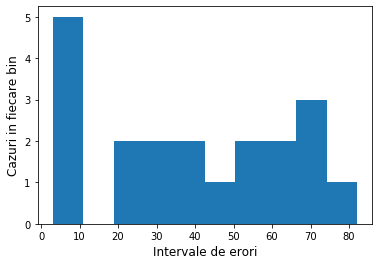

In [20]:
plt.hist(distance_between_points, bins=10)
plt.ylabel('Cazuri in fiecare bin', fontsize=12)
plt.xlabel('Intervale de erori', fontsize=12)

In [21]:
print("Sum:", np.sum(np.square(distance_between_points)))

Sum: 43772.36640637592


4.

Demo 1: am inteles legatura intre acel "Slider" si graf,
dar as fi vrut sa vad si putin cod, pentru a intelege lucrul cu widget in python.

Demo 2: mi-a placut, am inteles ca exista astfel de optiuni si cum sa le folosesc.
Conteaza foarte mult asocierea codului cu o imagine si cu o explicatie corespunzatoare.
As dori sa primesc mai multe astfel de exemple.

Demo 3: seamana cu modul dvs de predare, este un bun exemplu pentru a oferi suport in rezolvarea exercitiilor

Demo 4: acesta contine informatii care necesita explicatii suplimentare din partea dvs,
pentru a intelege importanta folosirii acelor secvente.

Top: 2, 3, 4, 1
